In [1]:
from evds import evdsAPI
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
key_cbrt = ''

In [15]:
today = datetime.today().strftime('%d-%m-%Y')
print(today)

25-01-2022


In [40]:
evds = evdsAPI(key_cbrt)

df = pd.DataFrame(data = evds.get_data(['TP.DK.USD.A.YTL','TP.DK.EUR.A.YTL'], startdate="01-01-2016", enddate=today))

df_dropped = df.dropna()

df_dropped_rev = df[::-1]

df_dropped_rev


,Tarih,TP_DK_USD_A_YTL,TP_DK_EUR_A_YTL
2216,25-01-2022,13.3846,15.1506
2215,24-01-2022,13.4020,15.1892
2214,23-01-2022,NaN,NaN
2213,22-01-2022,NaN,NaN
2212,21-01-2022,13.4431,15.2577
...,...,...,...
4,05-01-2016,2.9422,3.2116
3,04-01-2016,2.9181,3.1838
2,03-01-2016,NaN,NaN
1,02-01-2016,NaN,NaN


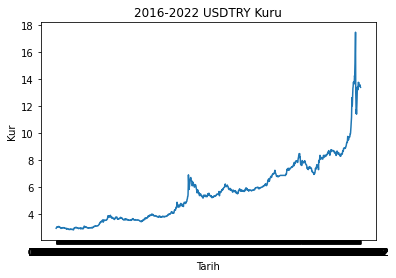

In [43]:
plt.plot(df_dropped['Tarih'],df_dropped['TP_DK_USD_A_YTL'])
plt.xlabel("Tarih")
plt.ylabel("Kur")
plt.title('2016-2022 USDTRY Kuru')

plt.show()

We can also get data by main categories.

In [5]:
evds.main_categories

,CATEGORY_ID,TOPIC_TITLE_TR
0,1,PİYASA VERİLERİ
1,2,KURLAR
2,3,FAİZ İSTATİSTİKLERİ
3,4,PARA VE BANKA İSTATİSTİKLERİ
4,5,MENKUL KIYMET İSTATİSTİKLERİ
5,12,FİNANSAL İSTATİSTİKLER
6,13,TCMB BİLANÇO VERİLERİ
7,14,FİYAT ENDEKSLERİ
8,15,ANKETLER
10,18,"ÖDEMELER DENGESİ, ULUSLARARASI YATIRIM POZİSYONU"


In [6]:
evds.get_sub_categories(20)

,CATEGORY_ID,DATAGROUP_CODE,DATAGROUP_NAME
0,20,bie_kbgen,Genel Bütçe Dengesi ve Finansmanı (Hazine ve M...
1,20,bie_kbicborc,İç Borç Stok Verileri(Hazine ve Maliye Bakanlı...
2,20,bie_kbmgel,Merkezi Yönetim Bütçe Gelirleri-Yeni Tanım (Ha...
3,20,bie_kbmgid,Merkezi Yönetim Bütçe Harcamaları-Yeni Tanım (...
4,20,bie_kbozgel,Özelleştirmeden Elde Edilen Gelirler (Özelleşt...
5,20,bie_kamuborcy,Kamu Kesimi Borçlanma Gereği (Strateji ve Bütç...


In [7]:
evds.get_series('bie_kbicborc')

,SERIE_CODE,SERIE_NAME,START_DATE
0,TP.KB.A01,1.Tahvil,01-12-1979
1,TP.KB.A02,1a.Tahvil Nakit,01-12-1979
2,TP.KB.A03,1b.Tahvil Nakit Dışı,01-12-1979
3,TP.KB.A04,2.Konsolide Borçlar ve Kur Farkları,01-12-1979
4,TP.KB.A05,3.Bonolar,01-12-1979
5,TP.KB.A06,3a.Bonolar Nakit,01-12-1979
6,TP.KB.A07,3b.Bonolar Nakit Dışı,01-12-1979
7,TP.KB.A08,4.Avans,01-12-1979
8,TP.KB.A09,5.Toplam,01-12-1979
